## Assignment 2 : Predicting Credit Card Default
Practical Application of Machine Learning to a Real World Problem

BENG0095 Assignment 2

Group Z: Raphaelle Thervet, Jeremy Obadia, Jeremy Yao.

## Introduction


The purpose of credit scoring is to classify the applicants into two types: applicants with good credit and applicants with bad credit. Applicants with good credit have great possibility to repay financial obligation. Applicants with bad credit have high possibility of defaulting. 
Credit scoring has become one of the primary ways for financial institutions to assess credit risk, improve cash flow, reduce possible risks and make managerial decisions (Huang, Chen, & Wang, 2007).


## Data Import


Our dataset is from UCI Machine Learning Repository: a csv file containing information on 30 000 bank customers and 24 predicting attributes. The independent variables contained are either nominal or numerical. The dependent variable is the customer's default status.

Source: Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [8]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Import data preprocessing libraries
from sklearn import preprocessing

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import ggplot
from ggplot import *
%matplotlib inline

#import libraries for model selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#import libraries for ensemble learning
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


In [2]:
#Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install ggplot
#!{sys.executable} -m pip install xgboost

In [9]:
# Load data
import pandas as pd
import numpy as np
train_data = pd.read_csv("CreditCard_train.csv")

train_data.columns=['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default_payment']
train_data.info()
credit=train_data.drop([0], axis=0)
credit = credit.astype(float)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24001 entries, 0 to 24000
Data columns (total 25 columns):
ID                 24001 non-null object
LIMIT_BAL          24001 non-null object
SEX                24001 non-null object
EDUCATION          24001 non-null object
MARRIAGE           24001 non-null object
AGE                24001 non-null object
PAY_0              24001 non-null object
PAY_2              24001 non-null object
PAY_3              24001 non-null object
PAY_4              24001 non-null object
PAY_5              24001 non-null object
PAY_6              24001 non-null object
BILL_AMT1          24001 non-null object
BILL_AMT2          24001 non-null object
BILL_AMT3          24001 non-null object
BILL_AMT4          24001 non-null object
BILL_AMT5          24001 non-null object
BILL_AMT6          24001 non-null object
PAY_AMT1           24001 non-null object
PAY_AMT2           24001 non-null object
PAY_AMT3           24001 non-null object
PAY_AMT4           24001 non-n

## Data Transformation and Exploration


In [10]:
credit.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,6.0,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,7.0,500000.0,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,8.0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,9.0,140000.0,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
10,10.0,20000.0,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


We are checking if there are any missing data:

In [11]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000
mean,12000.500000,165495.986667,1.628250,1.847417,1.55725,35.380458,-0.003125,-0.12350,-0.154750,-0.211667,...,42368.188417,40000.682542,38563.710625,5542.912917,5.815336e+03,4969.26600,4743.480042,4783.486042,5189.399042,0.223750
std,6928.347566,129128.744855,0.483282,0.780007,0.52208,9.271050,1.123425,1.20058,1.204033,1.166549,...,63070.680934,60345.012766,59155.759799,15068.576072,2.079703e+04,16095.61434,14883.269990,15270.405279,17630.371990,0.416765
min,1.000000,10000.000000,1.000000,0.000000,0.00000,21.000000,-2.000000,-2.00000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,6000.750000,50000.000000,1.000000,1.000000,1.00000,28.000000,-1.000000,-1.00000,-1.000000,-1.000000,...,2340.000000,1740.000000,1234.750000,1000.000000,8.000000e+02,379.00000,279.750000,244.000000,60.750000,0.000000
50%,12000.500000,140000.000000,2.000000,2.000000,2.00000,34.000000,0.000000,0.00000,0.000000,0.000000,...,18940.500000,18107.500000,17036.000000,2100.000000,2.000000e+03,1702.50000,1500.000000,1500.000000,1500.000000,0.000000
75%,18000.250000,240000.000000,2.000000,2.000000,2.00000,41.000000,0.000000,0.00000,0.000000,0.000000,...,52188.500000,49746.500000,48796.250000,5000.000000,5.000000e+03,4347.25000,4000.000000,4005.000000,4000.000000,0.000000
max,24000.000000,1000000.000000,2.000000,6.000000,3.00000,79.000000,8.000000,8.00000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.00000,497000.000000,417990.000000,528666.000000,1.000000


Target class has only two unique values and expects only two unique values. This would be a problem of binary classification

All our features are numeric data type and we will not be needed to deal with any non numeric categorical variables

"There are 24,000 distinct credit card clients.

The average value for the amount of credit card limit is 165495.987. The standard deviation is unusually large, max value being 1M.

Education level is mostly graduate school and university.

Most of the clients are either married or single (the other status are less frequent).

Average age is 35.4 years, with a standard deviation of 9.27.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.22375 means that there are 22.375% of credit card contracts that will default next month (will verify this in the next sections of this analysis)."

### Missing Data
To confirm that there aren't any missing data, let's compute a table matrix:

In [12]:
# Check for missing data

total = credit.isnull().sum().sort_values(ascending = False)
percent = (credit.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default_payment,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are no missing data in the entire data set

### Exploring the dataset into more details:

In [13]:
# Payment delay description

credit[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,24000.000000,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000
mean,-0.003125,-0.12350,-0.154750,-0.211667,-0.252917,-0.278000
std,1.123425,1.20058,1.204033,1.166549,1.136993,1.158169
min,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000


They all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0. But we will get to that later.

In [15]:
# Bill Statement description
credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000
mean,50596.884708,48646.064125,4.636706e+04,42368.188417,40000.682542,38563.710625
std,72649.374256,70364.600436,6.819390e+04,63070.680934,60345.012766,59155.759799
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3631.500000,3098.500000,2.773500e+03,2340.000000,1740.000000,1234.750000
50%,22330.000000,21339.000000,2.003900e+04,18940.500000,18107.500000,17036.000000
75%,65779.500000,62761.250000,5.929800e+04,52188.500000,49746.500000,48796.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Note the negative values.

### More Data Transformation and Feature Engineering
Inspired from the structure of the Kaggle notebook of Anubhav Kapoor.

In [16]:

credit.head(10)
# We can infer the Max & Min of LIMIT_BAL
# We can infer the Limits given to the SEX category 1 & 2.
# We can infer the Limits given to the EDUCATION category 1, 2, 3.
# We can infer the Limits given to the MARRIAGE category 1 & 2.

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,6.0,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,7.0,500000.0,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,8.0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,9.0,140000.0,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
10,10.0,20000.0,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


### Feature 1
We will create a new column for the category of age from young/middle/old. To prepare numerical matrices (e.g. for xgboost), we will avoid creating categories with string names, but rather use numbers.

In [17]:
credit.AGE.min()

21.0

In [18]:
credit.AGE.max()

79.0

In [19]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [20]:
credit['AGE_GROUP']= pd.cut(credit.AGE, [20,40,60,81], labels = ['Young','Middle','Old'])
#labels 1 for 'Young', 2 for 'Middle', and 3 for 'Old'
credit.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,AGE_GROUP
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,Young
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,Young
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,Young
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,Young
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,Middle
6,6.0,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0,Young
7,7.0,500000.0,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,...,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0,Young
8,8.0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0,Young
9,9.0,140000.0,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,...,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0,Young
10,10.0,20000.0,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,...,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0,Young


In [21]:
def cat_to_numeric(x):
    if x=='Young':
        return 3
    if x=='Middle':
        return 2
    if x=='Old':
        return 1

In [22]:
credit['AGE_GROUP'] = credit['AGE_GROUP'].apply(cat_to_numeric)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,AGE_GROUP
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,3
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,3
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,3
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,3
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,2


### Feature 2
We will create a new column for to categorise on the basis of limit balance : bronze , silver , gold 

In [23]:
credit.LIMIT_BAL.min()

10000.0

In [24]:
credit.LIMIT_BAL.max()

1000000.0

In [25]:
credit.LIMIT_BAL.mean()

165495.98666666666

In [26]:
credit.LIMIT_BAL.median()

140000.0

In [27]:
credit['CUSTOMER_CATEGORY'] = pd.cut(credit.LIMIT_BAL,[9999, 200000, 500000, 1000001], labels = [int("1"),int("2"),int("3")])
#labels 1 for 'Bronze', 2 for 'Silver' and 3 for 'Gold'

### Feature 3
We will create a new column to categorise the risk on the basis of previous default payments.

In [28]:
#adding a column PAY_TOTAL. It stands for the total number of payments done or missed. 
credit['PAY_TOTAL'] = (credit.PAY_0 + credit.PAY_2 + credit.PAY_3 + credit.PAY_4 + credit.PAY_5 + credit.PAY_6)

credit.PAY_TOTAL.head(10)


1     -2.0
2      3.0
3      0.0
4      0.0
5     -2.0
6      0.0
7      0.0
8     -3.0
9      2.0
10   -10.0
Name: PAY_TOTAL, dtype: float64

In [29]:
credit.PAY_TOTAL.min()

-12.0

In [30]:
credit.PAY_TOTAL.max()

36.0

### Observations
- Customers with score above -2 shows that the customers have always paid on time.
- Customers with positive values shows the number of payment default month by customer. 
- Customers have duly paid over a year are good customers.

In [31]:
#Categorising risk on the basis of previous payment defaults.
credit['RISK_CATEGORY'] = pd.cut(credit.PAY_TOTAL, [-13,-10,0,37], labels = [int("1"),int("2"),int("3")])
#labels 1 for 'Low', 2 for 'Middle', 3 for 'High'.

### Feature 4

We will create a new column to determine the total amount paid across the last 6 months.

In [32]:

credit["Amount_last_6_months"]=credit["PAY_AMT1"]+credit["PAY_AMT2"]+credit["PAY_AMT3"]+credit["PAY_AMT4"]+credit["PAY_AMT5"]+credit["PAY_AMT6"]
credit.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,AGE_GROUP,CUSTOMER_CATEGORY,PAY_TOTAL,RISK_CATEGORY,Amount_last_6_months
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,3,1,-2.0,2,689.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,1000.0,1000.0,0.0,2000.0,1.0,3,1,3.0,3,5000.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,1000.0,1000.0,1000.0,5000.0,0.0,3,1,0.0,2,11018.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,1200.0,1100.0,1069.0,1000.0,0.0,3,1,0.0,2,8388.0
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,10000.0,9000.0,689.0,679.0,0.0,2,1,-2.0,2,59049.0


### Note for later
When creating matrices for boosting models such as xgboost, we will want to be careful with the category we created because they are strings. We will need to create numerical matrices.

### Data unbalance
Let's show the data unbalance with a graph illustrating the 22.375% of credit card contracts that will default next month.

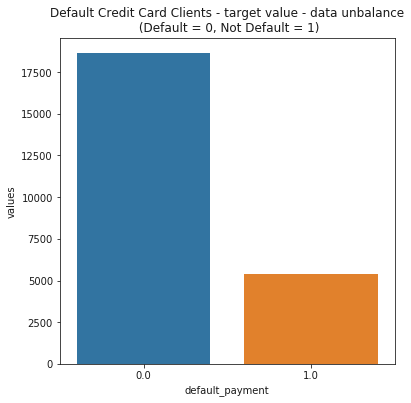

In [33]:

temp = credit["default_payment"].value_counts()
credit_1 = pd.DataFrame({'default_payment': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default_payment', y="values", data=credit_1)
locs, labels = plt.xticks()
plt.show()

The data has not a large unbalance with respect of the target value (default_payment).

In [34]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,AGE_GROUP,CUSTOMER_CATEGORY,PAY_TOTAL,RISK_CATEGORY,Amount_last_6_months
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,3,1,-2.0,2,689.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,1000.0,1000.0,0.0,2000.0,1.0,3,1,3.0,3,5000.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,1000.0,1000.0,1000.0,5000.0,0.0,3,1,0.0,2,11018.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,1200.0,1100.0,1069.0,1000.0,0.0,3,1,0.0,2,8388.0
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,10000.0,9000.0,689.0,679.0,0.0,2,1,-2.0,2,59049.0


### Data Visualisation and Exploration


In [35]:
#Correlation between the attributes 

corr_matrix = credit.corr()
corr_matrix["default_payment"].sort_values(ascending = False)

default_payment         1.000000
PAY_0                   0.321702
PAY_TOTAL               0.278947
PAY_2                   0.259341
PAY_3                   0.231843
PAY_4                   0.212093
PAY_5                   0.204637
PAY_6                   0.185331
EDUCATION               0.027478
AGE                     0.008131
BILL_AMT6              -0.005609
BILL_AMT5              -0.006495
BILL_AMT4              -0.009682
ID                     -0.009774
BILL_AMT3              -0.015070
BILL_AMT2              -0.016201
BILL_AMT1              -0.022493
MARRIAGE               -0.026127
SEX                    -0.039452
PAY_AMT5               -0.052869
PAY_AMT6               -0.056756
PAY_AMT4               -0.058059
PAY_AMT3               -0.058935
PAY_AMT2               -0.061610
PAY_AMT1               -0.077859
Amount_last_6_months   -0.110564
LIMIT_BAL              -0.148726
Name: default_payment, dtype: float64

The most correlated atttributes with "default_payment" are "PAY_0", "PAY_TOTAL", "PAY_02", "PAY_03", "PAY_04", "PAY_05", "PAY_06", "LIMIT_BAL" and "Amount_last_6_months". The negative correlation between "LIMIT_BAL" and "default_payment" may appear counter intuitive. However, it is important to bear in mind that the high risk individuals oftne do not have large credit card balance limit. Thus a low credit card balance limit amount may be an indicator of higher default probability. Let us vizualize these relations with a correlation matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c0cd617f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c178aff98>]], dtype=object)

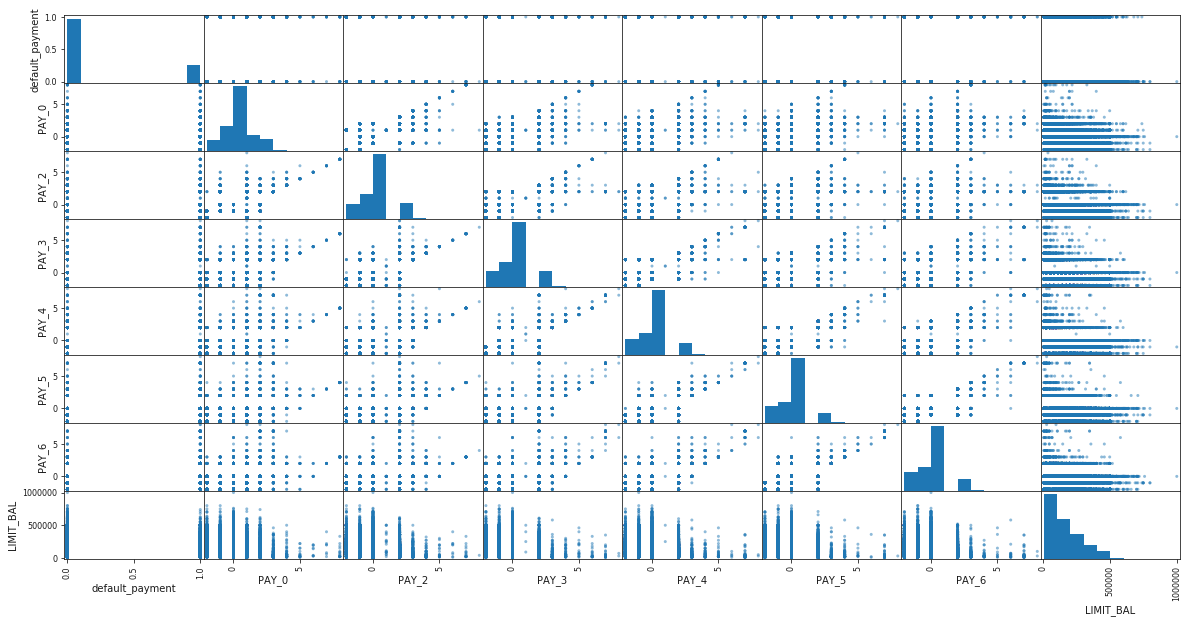

In [36]:
# Warning: takes around 2mins to run
from pandas.plotting import scatter_matrix
attributes = ["default_payment","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","LIMIT_BAL"]
scatter_matrix(credit[attributes],figsize=(20,10))

The main diagonal (top left to bottom right) would be full of straight lines if Pandas plotted each variable against itself, so instead we have here a histogram of each variable.

Here we have multiple diagrams describing each of the variables. It allows us to have a greater picture of the data. We can observe that the age of customers can be broken down into five main brackets for instance.

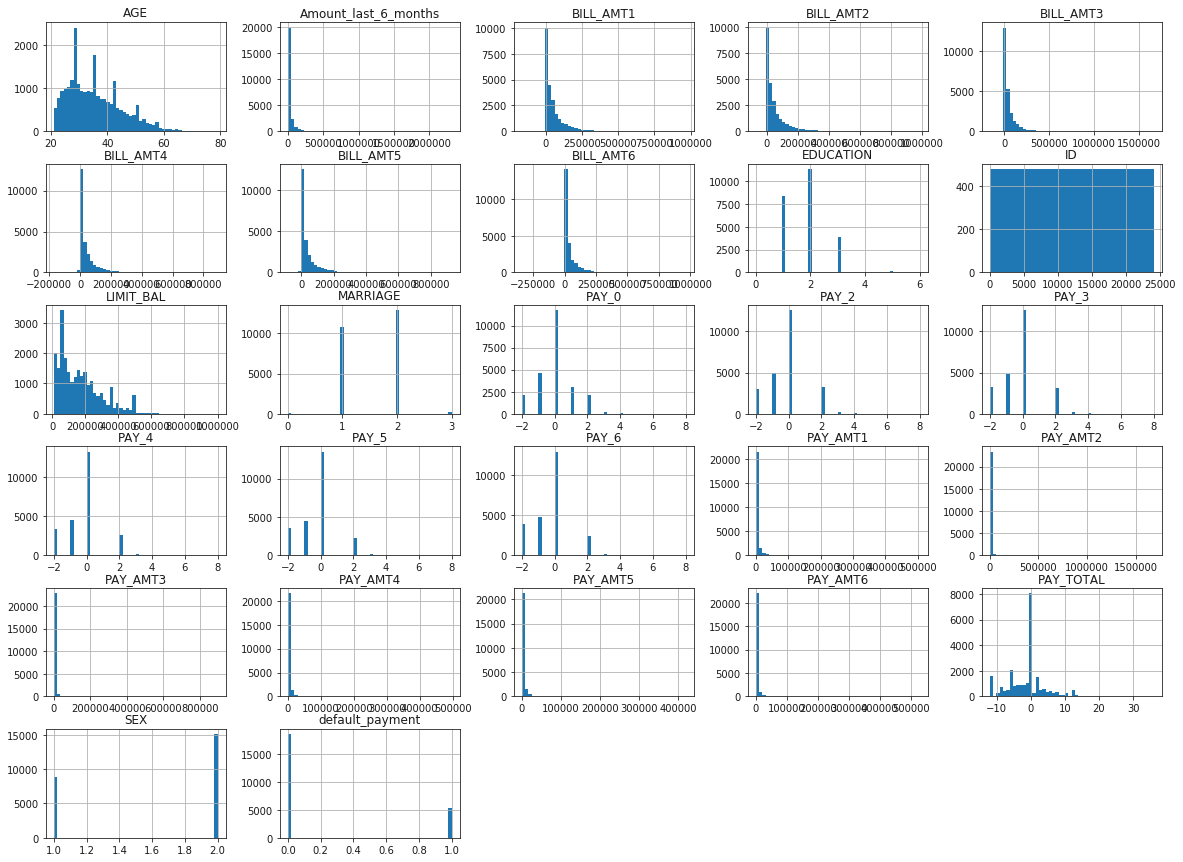

In [37]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
credit.hist(bins=50, figsize =(20,15))
plt.show()


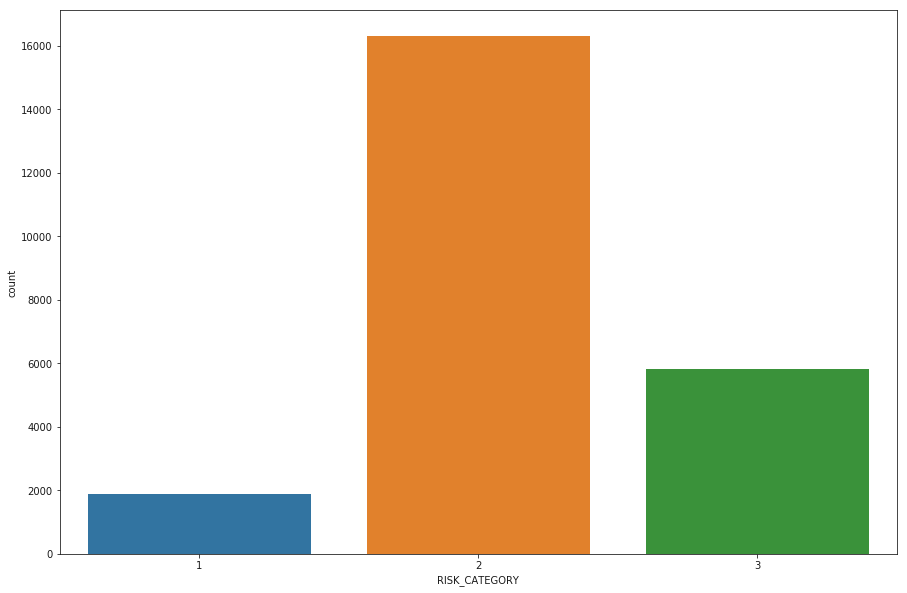

In [38]:
#Division of people on the basis of their risk category
plt.figure(figsize = (15,10))
sns.countplot(x='RISK_CATEGORY', data=credit)

We can observe that most customers are medium risk, while both extremes (low and high risk individuals) represent a significantly lower portion of the data. However, high risk individuals are greater than low risk ones.

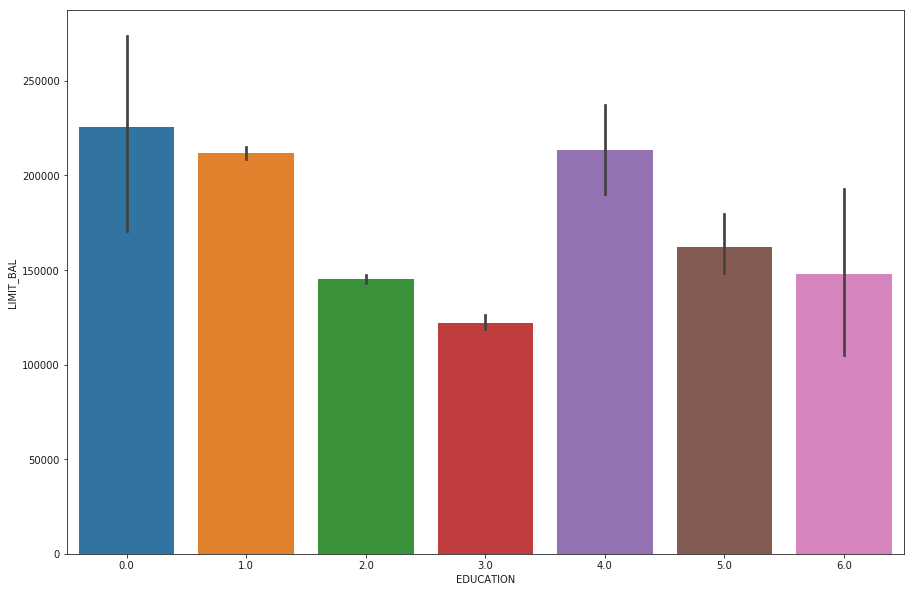

In [39]:
plt.figure(figsize = (15,10))
sns.barplot(x='EDUCATION', y='LIMIT_BAL', data=credit)

As expected, the lower education levels have a lower amount of credit. We observe some noise as we do not know how to interpret the label "0", "5" and "6" since it is not explained in the dataset. Moreover, the label "4" is also vague since it may emcompass very different education level.

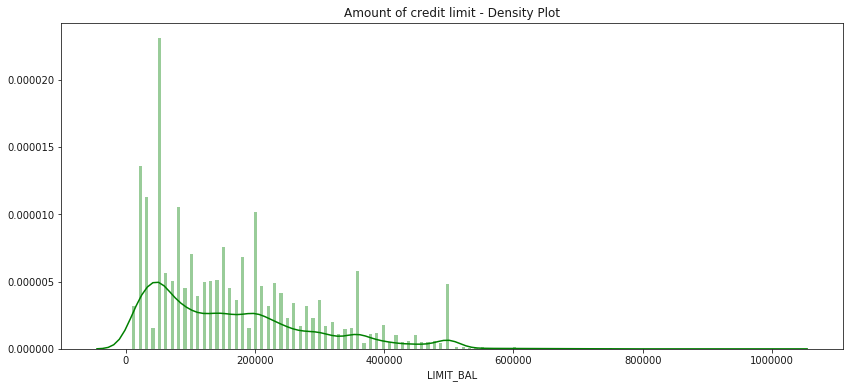

In [40]:
import seaborn as sns

plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(credit['LIMIT_BAL'],kde=True,bins=200, color="green")
plt.show()

Largest group of amount of credit limit is apparently for amount of 50K.

In [41]:
credit['LIMIT_BAL'].value_counts().head(5)

50000.0     2740
20000.0     1613
30000.0     1342
80000.0     1255
200000.0    1208
Name: LIMIT_BAL, dtype: int64

As expected, the largest number of credit cards are with balance limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

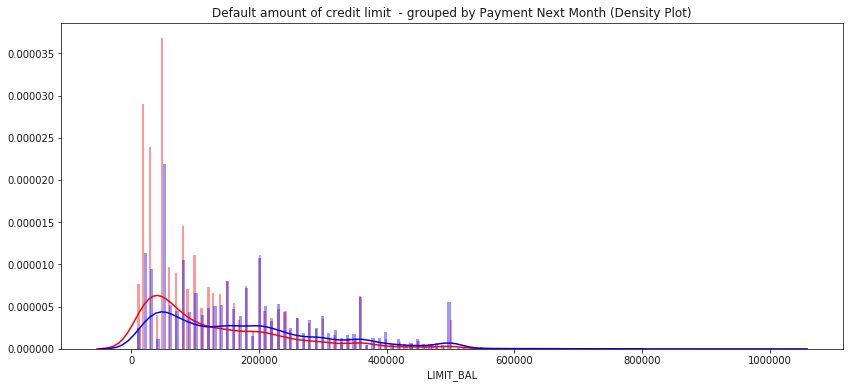

In [42]:
class_0 = credit.loc[credit['default_payment'] == 0]["LIMIT_BAL"]
class_1 = credit.loc[credit['default_payment'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="blue")
plt.show()

Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.

## Methodology Overview


__Literature Review__

Recent studies suggest combining multiple classifiers (i.e., ensemble learning) may result in a better performance.

According to (Skurichina and Duin, 2002), the term ‘weak classifier’ can refer to different things: badly performing classifiers, unstable classifiers, classifiers of a low complexity, or classifiers depending upon certain assumed models that are not always true. The papers describes a way to improve these weak classifiers by constructing many weak classifiers and to combine them into a powerful decision rule. 

The paper from  (Breiman, 1996) tells us that the Bagging scheme is a well known procedure for creating ensembles of classifiers that performs best when applied to weak and unstable classifiers. Bagging stands for Bootstrap Aggregating
ensemble method.

The paper from (Abellán and Mantas, 2013) uses a speciam type of Decision Trees called Credal Decision Trees which outperforms previous study, (Nanni & Lumini, 2009), one about several techniques to create ensembles of classifiers based on some complex classifiers, including ANNs. The conclusion presented in Nanni and Lumini (2009) was that the best ensemble scheme is a Random Subspace (RS) of Levenberg–Marquardtneural nets (LNMC). This scheme performed better than the Bagging scheme applied to the same base classifier.

In this notebook, we will compare well-established techniques such as logistic regression to newly developed machine learning techniques such as least square support vector machines, gradient boosting and random forests. The techniques proposed will have different approaches such as decreasing the variance (bagging), bias (boosting) or improving the predictive force (stacking or ensemble).

Limits: It is common practice to use a small number of data sets , many of which contain only few cases and/or independent variables, whereas real-world credit data sets are typically large and high-dimensional.

From the paper (Baesens, 2015) we understand that most studies rely on a single performance measure or measures of the same type. In general, performance measures split into three types. Those that assess the discriminatory ability of the scorecard (e.g., AUC); those that assess the accuracy of the scorecard’s probability predictions (e.g., Brier Score) and those that assess the correctness of the scorecards’ categorical predictions (e.g., classification error). Different types of indicators embody a different notion of classifier performance. Few studies mix evaluation measures from different categories.

The research of (Baesens, 2015) confirms that ensemble learning have better performance with heterogeneous ensembles securing the top 11 ranks. It also shows that Random Forest is a good benchmark and performs well. Their findings show that it outperforms several alternative methods (including SVMs, ANNs, and boosting).

Selective ensembles are an active field of research and have shown promising results in many domains (e.g., Partalas, et al., 2010). 

Ensemble classifiers integrate the prediction of multiple models, called base models. We distinguish homogeneous ensembles, which create the base models using the same algorithm, and heterogeneous ensembles, which employ different classifiers. 

Hill-climbing ensemble selection with bagging
For the purpose of testing models we learnt in the course, we will apply the Kernel-SVM and PCA.

__Individual classifiers__:
- Logistic Regression
- Decision Trees
- RBF-Kernel Support Vector Machine 


__Ensemble Learning classifiers__:
- Bagging (Random Forest)
- Gradient Boosting (XGBoost)
- Heterogeneous Ensemble Learning (Stacker Model)

__Attempts & Model evaluation__:
We tried to assess the model performance with accuracy, which proved to be misleading: our result for Decision Tree classifier was 82% where as in the dataset 20% of clients default, so only by making a model that just assignes 0 to default_payment yields an 80% of accuracy. In this sense, accuracy can be a misleading metric of the quality of our model.
We chose to complement our model evaluation by adding the f-1 score, which takes into account the false positives, the false negatives. 


The area under the Receiver Operating Characteristic curve. The Receiver Operating Characteristic curve (Fawcett, 2004, Huang et al., 2005) is a two-dimensional measure of classification performance that plots the True Positive rate against the False Positive rate. In the machine learning literature it is well known that AUC is one of the best method for comparing classifiers in two-class problems (Fawcett, 2004).

F1 Score takes into account:
- Type I error (Tsai & Wu, 2007), number of patterns that belong to the bad credit group incorrectly classified into the good credit group.
- Type II error (Tsai & Wu, 2007), number of patterns that belong to the good credit group incorrectly classified into the bad credit group.


## Model training/validation
This contains a breakdown of how your model was trained and evaluated.
To evaluate our models we will use a different set of metrics:
- Accuracy measure
- Precision measure
- Brier Score Loss
- f1 score
- ROC-AUC

### Define predictors and target values
Let's define the predictor features and the target features. 

In [43]:

target = 'default_payment'
predictors = [  'LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1'
              ,'BILL_AMT2','BILL_AMT3','BILL_AMT4',
              'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','AGE_GROUP',
             'CUSTOMER_CATEGORY','PAY_TOTAL','RISK_CATEGORY']


### Split the data into training set and test set
Let's define the training set and the validation set.

In [44]:
X_train1 = credit.loc[:, credit.columns!='default_payment'].values
y_train1 = credit["default_payment"].values

In [45]:
# split the df into train and test, it is important these two do not communicate during the training
X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1 , test_size=0.20, random_state= 30, shuffle=True )

In [46]:
len(X_valid)

4800

### Normalising the data: Feature Scaling 
Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized,

In [47]:
range_train = (X_train-X_train.min()).max()
X_train_scaled = (X_train - X_train.min())/range_train

In [48]:
range_valid = (X_valid-X_valid.min()).max()
X_valid_scaled = (X_valid - X_valid.min())/range_valid

### Principal Dimensional Reduction
Principal Component Analysis is a technique of dimension reduction. We usually are surrounded by data with a large number of variables, some of which might be correlated. This correlation between variables brings about a redundancy in the information that can be gathered by the data set. Thus in order to reduce the computational and cost complexities, we use PCA to transform the original variables to the linear combination of these variables which are independent.


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4) #we want to avoid a too high lost of information
X_train = pca.fit_transform(X_train_scaled)
X_valid = pca.fit_transform(X_valid_scaled)
explained_variance = pca.explained_variance_ratio_
print(pd.DataFrame(explained_variance))

          0
0  0.581895
1  0.295946
2  0.051449
3  0.025790


### Logistic Regression

It is an industry standard that performs well. We don't expect the data to be linearly separable which is why Random Forest and Kernel-SVM might perform better.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

classifier_log = LogisticRegression(random_state = 0, penalty = 'l1')
classifier_log.fit( X_train, y_train )
y_pred1 = classifier_log.predict( X_valid )



cm = confusion_matrix( y_valid, y_pred1 )

scoresLOG = cross_val_score( classifier_log, X_train, y_train, cv=10)
print("Mean RegLog CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresLOG.mean(), scoresLOG.std() ))


acc_log = accuracy_score(y_true = y_valid, y_pred = y_pred1)
prec_log = precision_score(y_valid, y_pred1)
roc_log = roc_auc_score(y_true = y_valid, y_score= y_pred1)
bri_log = brier_score_loss(y_true= y_valid, y_prob=y_pred1)
f1_log = f1_score(y_true= y_valid, y_pred= y_pred1,average='binary')

results = pd.DataFrame([['Logistic Regression', acc_log, prec_log, roc_log, bri_log, f1_log]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])



Mean RegLog CrossVal Accuracy on Train Set 0.77, with std=0.00


### RBF-Kernel SVM

Support vector machines (SVMs) are a set of powerful supervised
learning techniques used for classification and regression.
Their basic principle is to construct a maximum-margin separating
hyperplane in some transformed feature space. SVMs are particularly well suited for classification of complex but small or medium-sized datasets like ours.

In [51]:
# It takes some time to run 5-10min
from sklearn.svm import SVC
classifier_SVM = SVC(kernel="rbf",class_weight ='balanced')
classifier_SVM.fit( X_train, y_train )
y_pred_SVM = classifier_SVM.predict(X_valid )

cm = confusion_matrix( y_valid, y_pred_SVM )
scoresSVC = cross_val_score(classifier_SVM, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))

acc_SVM = accuracy_score(y_true = y_valid, y_pred = y_pred_SVM)
prec_SVM = precision_score(y_valid, y_pred_SVM)
roc_SVM = roc_auc_score(y_true = y_valid, y_score= y_pred_SVM)
bri_SVM = brier_score_loss(y_true= y_valid, y_prob=y_pred_SVM)
f1_SVM = f1_score(y_true= y_valid, y_pred= y_pred_SVM,average='binary')


model_results = pd.DataFrame([['SVM (RBF)', acc_SVM, prec_SVM, roc_SVM, bri_SVM, f1_SVM]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)

Mean kernel-SVM CrossVal Accuracy on Train Set 0.46, with std=0.01


### Gaussian Naive Bayes (Generative Classification)
The Naive Bayes Classifier technique is based on the Bayesian theorem with strong (naive) independence assumptions between the features. It is particularly suited when the dimensionality of the inputs is high. Despite its simplicity, Naive Bayes can often outperform more sophisticated classification methods.

In [52]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit( X_train, y_train )
y_pred_nb = classifier_nb.predict( X_valid )

acc_nb = accuracy_score(y_true = y_valid, y_pred = y_pred_nb)
prec_nb = precision_score(y_valid, y_pred_nb)
roc_nb = roc_auc_score(y_true = y_valid, y_score= y_pred_nb)
bri_nb = brier_score_loss(y_true= y_valid, y_prob=y_pred_nb)
f1_nb = f1_score(y_true= y_valid, y_pred= y_pred_nb,average='binary')

model_results = pd.DataFrame([['Naive Bayes', acc_nb, prec_nb, roc_nb, bri_nb, f1_nb]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)

### Decision Tree

Decision Tree is sensitive to small changes in the data, leading to different results. For this reason, it is common to use ensembles such as Random Forest to avoid this risk.

There are a few parameters to be settle for the classifier, such as the function to determine the quality of a split, or how deep the tree has to be. We will first test it with a random choice of those parameters and then choose our hyperparameters with k-fold cross validation to avoid overfitting and underfitting.

In [53]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [55]:
#create the classifier
classifier = DecisionTreeClassifier(max_depth=3, random_state=14) 
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_valid)
# see how good we did on the test
acc_dec = accuracy_score(y_true = y_valid, y_pred = predictions)
prec_dec = precision_score(y_valid, predictions)
roc_dec = roc_auc_score(y_true = y_valid, y_score= predictions)
bri_dec = brier_score_loss(y_true= y_valid, y_prob=predictions)
f1_dec = f1_score(y_true= y_valid, y_pred= predictions)

model_results = pd.DataFrame([['Decision Tree 1', acc_dec, prec_dec, roc_dec, bri_dec, f1_dec]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)

In [56]:
# define the parameters grid
param_grid = {'max_depth': np.arange(5, 12),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [20,100],
             'min_samples_split': [5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1')


#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

# One outcome is:
#DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
  #          max_features=None, max_leaf_nodes=100,
  #          min_impurity_decrease=0.0, min_impurity_split=None,
  #          min_samples_leaf=1, min_samples_split=5,
  #          min_weight_fraction_leaf=0.0, presort=False, random_state=None,
  #          splitter='best')

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.199626570748


In [57]:
#create the tuned classifier
classifier2 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
# training the classifier
classifier2.fit(X_train, y_train)
# do our predictions on the test
predictions2 = classifier2.predict(X_valid)
# see how good we did on the test
acc_dec2 = accuracy_score(y_true = y_valid, y_pred = predictions2)
prec_dec2 = precision_score(y_valid, predictions2)
roc_dec2 = roc_auc_score(y_true = y_valid, y_score= predictions2)
bri_dec2 = brier_score_loss(y_true= y_valid, y_prob=predictions2)
f1_dec2 = f1_score(y_true= y_valid, y_pred= predictions2)
#printing our scores

model_results = pd.DataFrame([['Decision Tree Tuned', acc_dec2, prec_dec2, roc_dec2, bri_dec2, f1_dec2]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)

Here we have a slight improvement using cross validation to tune our parameters

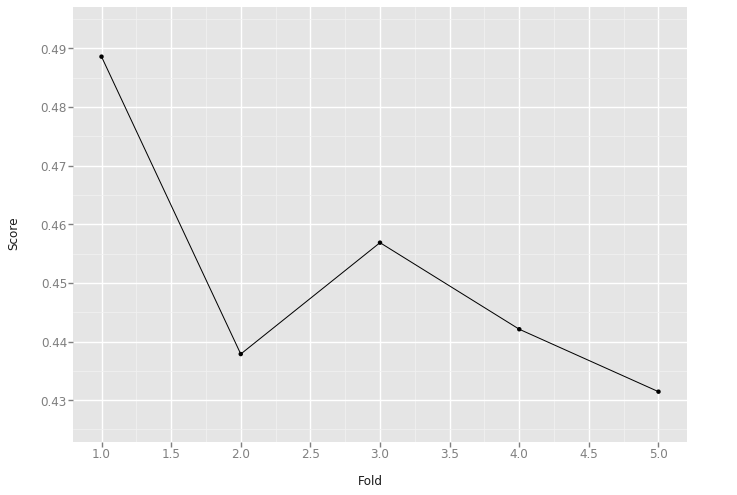

<ggplot: (7545515272)>


In [60]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(credit)):
    training = credit.iloc[train_index,:]
    valid = credit.iloc[test_index,:]
    feats = training[predictors] #defined above
    label = training['default_payment']
    valid_feats = valid[predictors]
    valid_label = valid['default_payment']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = f1_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance = pd.DataFrame({'Score':scr,'Fold':fold})
# let's see what we have with ggplot
g = ggplot(performance,aes(x='Fold',y='Score')) + geom_point() + geom_line()
print(g)

In [61]:
# Let's see how important the features are in this model:

def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(classifier, predictors)

,feat,score
5,PAY_0,0.753340
25,PAY_TOTAL,0.166019
19,PAY_AMT3,0.056160
11,BILL_AMT1,0.014948
9,PAY_5,0.006816
14,BILL_AMT4,0.002716
0,LIMIT_BAL,0.000000
16,BILL_AMT6,0.000000
24,CUSTOMER_CATEGORY,0.000000
23,AGE_GROUP,0.000000


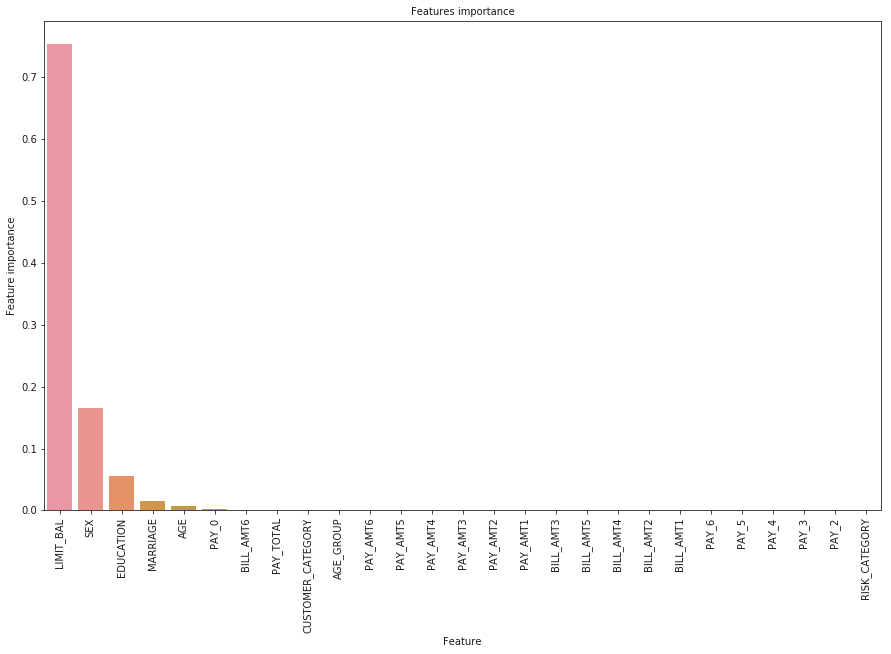

In [62]:
get_feature_importance(classifier, predictors)
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': get_feature_importance(classifier, predictors)["score"]})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (15,9))
plt.title('Features importance',fontsize=10)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

The most important features are __LIMIT_BAL__, __SEX__, __EDUCATION__, __MARRIAGE__ and __AGE__ for this classifier.

### Bagging (Random Forest) 
Random forests are defined as a group of un-pruned classification
or regression trees, trained on bootstrap samples of the training
data using random feature selection in the process of tree
generation. After a large number of trees have been generated,
each tree votes for the most popular class. These tree voting procedures
are collectively defined as random forests.


In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier_forest = RandomForestClassifier(n_estimators=10)
classifier_forest.fit( X_train, y_train )
y_pred_forest = classifier_forest.predict( X_valid )

cm = confusion_matrix( y_valid, y_pred_forest )

scoresRF = cross_val_score( classifier_forest, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))

# see how good we did on the test
acc_forest = accuracy_score(y_true = y_valid, y_pred = y_pred_forest)
prec_forest = precision_score(y_valid, y_pred_forest)
roc_forest = roc_auc_score(y_true = y_valid, y_score= y_pred_forest)
bri_forest = brier_score_loss(y_true= y_valid, y_prob=y_pred_forest)
f1_fo = f1_score(y_true= y_valid, y_pred= y_pred_forest)
#printing our scores

model_results = pd.DataFrame([['Random Forest', acc_forest, prec_forest, roc_forest, bri_forest, f1_fo]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)

Mean RandomForest CrossVal Accuracy on Train Set 0.76, with std=0.00


In [64]:
# Warning: it does take 10mins to run
# define the parameters grid
param_grid_forest = {'n_estimators': [2],
              'max_depth' : [12,15],
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [100,120],
             'min_samples_split': [2, 5]}


# create the grid
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid_forest, cv = 5, scoring= 'f1')


#training
grid_forest.fit(X_train, y_train)
#let's see the best estimator
print(grid_forest.best_estimator_)
#with its score
print(np.abs(grid_forest.best_score_))

#The Result is:
#RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
   #         max_depth=8, max_features='auto', max_leaf_nodes=100,
    #        min_impurity_decrease=0.0, min_impurity_split=None,
     #       min_samples_leaf=1, min_samples_split=5,
       #     min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
         #   oob_score=False, random_state=None, verbose=0,
           # warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.201790637387


___Random Forest Tuned___

In [65]:
classifier_forest_tuned = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=120,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

classifier_forest_tuned.fit( X_train, y_train )
y_pred_forest_tuned = classifier_forest_tuned.predict( X_valid )

cm = confusion_matrix( y_valid, y_pred_forest )

scoresRF = cross_val_score( classifier_forest_tuned, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))

# see how good we did on the test
acc_forest_tuned = accuracy_score(y_true = y_valid, y_pred = y_pred_forest_tuned)
prec_forest_tuned = precision_score(y_valid, y_pred_forest_tuned)
roc_forest_tuned = roc_auc_score(y_true = y_valid, y_score= y_pred_forest_tuned)
bri_forest_tuned = brier_score_loss(y_true= y_valid, y_prob=y_pred_forest_tuned)
f1_fo_tuned = f1_score(y_true= y_valid, y_pred= y_pred_forest_tuned)
#printing our scores

model_results = pd.DataFrame([['Random Forest Tuned', acc_forest_tuned, prec_forest_tuned, roc_forest_tuned,
                               bri_forest_tuned, f1_fo_tuned]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)


Mean RandomForest CrossVal Accuracy on Train Set 0.76, with std=0.01


### Boosting (XGBoost) 
Gradient boosting (Friedman, 2001, 2002) is an ensemble algorithm
that improves the accuracy of a predictive function through
incremental minimisation of the error term. After the initial base
learner (most commonly a tree) is grown, each tree in the series
is fit to the so-called ‘‘pseudo residuals’’ of the prediction from
the earlier trees with the purpose of reducing the error. 


In [66]:
import xgboost as xgb
from xgboost import XGBClassifier
from time import time

In [67]:

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train, eval_metric='auc')


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [68]:
y_pred_xgb = xgb_classifier.predict(X_valid)

roc_xgb = roc_auc_score(y_valid, y_pred_xgb)
prec_xgb = precision_score(y_valid, y_pred_xgb)
acc_xgb = accuracy_score(y_valid, y_pred_xgb)
bri_xgb = brier_score_loss(y_true= y_valid, y_prob=y_pred_xgb)
f1_xgb = f1_score(y_valid, y_pred_xgb)

scoresXGB = cross_val_score( xgb_classifier, X_train, y_train, cv=10)
print("Mean XGBoost CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresXGB.mean(), scoresXGB.std() ))
model_results = pd.DataFrame([['XGBoost', acc_xgb, prec_xgb, roc_xgb,
                               bri_xgb, f1_xgb]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)


Mean XGBoost CrossVal Accuracy on Train Set 0.78, with std=0.00


### Stacked Classification and GridSearch

Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier. The individual classification models are trained based on the complete training set; then, the meta-classifier is fitted based on the outputs -- meta-features -- of the individual classification models in the ensemble. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.

The k-nearest neighbours algorithm (k-NN) classifies a datapoint by taking a majority vote of its k most similar data points(Hastie, Tibshirani, & Friedman, 2001). The similarity measure used is the Euclidean distance between the two points.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier


In [76]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install mlxtend
# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta-logisticregression__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_train, y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.683 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.683 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.683 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta-logisticregression__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.683 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta-logisticregression__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.757 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.762 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.757 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta-logisticregression__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.762 +/- 0.00 {'kneighborsclassifier__n_neighbors':

___Tuned Hyperparameters Stacker Model___

In [77]:
#With GridSearchCV we have tuned our parameters, we will run our optimal stacked model:

clf1a = KNeighborsClassifier(n_neighbors=5)
clf2a = RandomForestClassifier(random_state=1,n_estimators=50)
clf3a = GaussianNB()
lra = LogisticRegression(C=0.1)
sclfa = StackingClassifier(classifiers=[clf1a, clf2a, clf3a], 
                          meta_classifier=lra)

sclfa.fit(X_train, y_train)
y_pred_stacker = sclfa.predict( X_valid )

cm = confusion_matrix( y_valid, y_pred_stacker )

# see how good we did on the test
acc_stack = accuracy_score(y_true = y_valid, y_pred = y_pred_stacker)
prec_stack = precision_score(y_valid, y_pred_stacker)
roc_stack = roc_auc_score(y_true = y_valid, y_score= y_pred_stacker)
bri_stack = brier_score_loss(y_true= y_valid, y_prob= y_pred_stacker)
f1_stack = f1_score(y_true= y_valid, y_pred= y_pred_stacker)

model_results = pd.DataFrame([['Stacker Model 1', acc_stack, prec_stack, roc_stack,
                               bri_stack, f1_stack]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)


__ Stacker Model 2__

In [78]:

clf1a = GaussianNB()
clf2a = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=120,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf3a = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

lra = LogisticRegression(C=0.1)
sclfa = StackingClassifier(classifiers=[clf1a, clf2a, clf3a], 
                          meta_classifier=lra)

sclfa.fit(X_train, y_train)
y_pred_stacker2 = sclfa.predict( X_valid )

cm = confusion_matrix( y_valid, y_pred_stacker )

# see how good we did on the test
acc_stack2 = accuracy_score(y_true = y_valid, y_pred = y_pred_stacker2)
prec_stack2 = precision_score(y_valid, y_pred_stacker2)
roc_stack2 = roc_auc_score(y_true = y_valid, y_score= y_pred_stacker2)
bri_stack2 = brier_score_loss(y_true= y_valid, y_prob= y_pred_stacker2)
f1_stack2 = f1_score(y_true= y_valid, y_pred= y_pred_stacker2)

model_results = pd.DataFrame([['Stacker Model 2', acc_stack2, prec_stack2, roc_stack2,
                               bri_stack2, f1_stack2]], columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)


## Results
Here you show the results that you obtain using your model on the training data. If you have multiple variations or approaches, this is where you compare them.

In [79]:
print(results)

                  Model  Accuracy  Precision   ROC-AUC     Brier  F1 Score
0   Logistic Regression  0.782708   0.533333  0.508675  0.217292  0.043996
1             SVM (RBF)  0.471875   0.258671  0.576845  0.528125  0.386347
2           Naive Bayes  0.768333   0.373077  0.524657  0.231667  0.148545
3       Decision Tree 1  0.721458   0.201232  0.495034  0.278542  0.127854
4       Decision Tree 1  0.721458   0.201232  0.495034  0.278542  0.127854
5   Decision Tree Tuned  0.667292   0.252915  0.523851  0.332708  0.260990
6         Random Forest  0.630625   0.269791  0.550063  0.369375  0.324571
7   Random Forest Tuned  0.733542   0.327407  0.545172  0.266458  0.256827
8               XGBoost  0.615833   0.290000  0.583709  0.384167  0.374067
9       Stacker Model 1  0.602500   0.254276  0.538979  0.397500  0.318571
10      Stacker Model 1  0.602500   0.254276  0.538979  0.397500  0.318571
11      Stacker Model 2  0.692917   0.200280  0.492303  0.307083  0.162500


As expected from our literature review, our random forest yielded relatively robust performance while our ensemble models performed uniformally well across all the metrics. The logistic regression model displayed a very interesting accuracy but underperformed in terms of F1 score. It means that the model does not take into account false positive and true negative, which are crucial in business contexts and especially credit default. On the other hand, our SVM model exhibited the opposite as it has the most performant F1 score and the least performant accuracy.

## Final predictions on test set
This is the section where you perform your final predictions on the test set using the model that you have trained in the previous section.

In [80]:
test_data = pd.read_csv("CreditCard_test.csv")
test_data.columns=['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default_payment']
test_data=test_data.drop([0], axis=0)

test_data_1 = test_data.astype(float)


In [81]:
test_data_1['AGE_GROUP']= pd.cut(test_data_1.AGE, [20,40,60,81], labels = ['Young','Middle','Old'])
#labels 1 for 'Young', 2 for 'Middle', and 3 for 'Old'
test_data_1.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,AGE_GROUP
1,24001.0,50000.0,1.0,2.0,2.0,23.0,2.0,2.0,0.0,0.0,...,21247.0,20066.0,8.0,2401.0,2254.0,2004.0,704.0,707.0,0.0,Young
2,24002.0,60000.0,1.0,2.0,2.0,26.0,0.0,0.0,0.0,0.0,...,26958.0,28847.0,2282.0,2324.0,2049.0,2000.0,3000.0,1120.0,1.0,Young
3,24003.0,400000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,...,20737.0,9545.0,2501.0,10009.0,1437.0,1105.0,510.0,959.0,0.0,Young
4,24004.0,20000.0,1.0,5.0,2.0,27.0,5.0,4.0,3.0,2.0,...,20113.0,19840.0,0.0,0.0,0.0,900.0,0.0,0.0,0.0,Young
5,24005.0,50000.0,1.0,3.0,2.0,27.0,0.0,0.0,-2.0,-2.0,...,70.0,120.0,0.0,100.0,0.0,70.0,200.0,100.0,0.0,Young
6,24006.0,110000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,...,105988.0,108617.0,5500.0,6000.0,6000.0,4000.0,5000.0,4000.0,0.0,Young
7,24007.0,30000.0,1.0,3.0,2.0,23.0,0.0,0.0,-2.0,-1.0,...,7704.0,20204.0,430.0,400.0,601.0,7504.0,15005.0,5674.0,0.0,Young
8,24008.0,230000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,...,9811.0,9865.0,1816.0,5105.0,1293.0,2000.0,528.0,3000.0,0.0,Young
9,24009.0,20000.0,1.0,3.0,3.0,23.0,0.0,0.0,0.0,0.0,...,19807.0,12294.0,2000.0,20000.0,1612.0,1121.0,702.0,1000.0,0.0,Young
10,24010.0,30000.0,1.0,1.0,2.0,24.0,0.0,0.0,0.0,2.0,...,4430.0,906.0,1440.0,2259.0,0.0,1500.0,425.0,895.0,0.0,Young


In [82]:
def cat_to_numeric(x):
    if x=='Young':
        return 3
    if x=='Middle':
        return 2
    if x=='Old':
        return 1

In [83]:
test_data_1['AGE_GROUP'] = test_data_1['AGE_GROUP'].apply(cat_to_numeric)
test_data_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,AGE_GROUP
1,24001.0,50000.0,1.0,2.0,2.0,23.0,2.0,2.0,0.0,0.0,...,21247.0,20066.0,8.0,2401.0,2254.0,2004.0,704.0,707.0,0.0,3
2,24002.0,60000.0,1.0,2.0,2.0,26.0,0.0,0.0,0.0,0.0,...,26958.0,28847.0,2282.0,2324.0,2049.0,2000.0,3000.0,1120.0,1.0,3
3,24003.0,400000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,...,20737.0,9545.0,2501.0,10009.0,1437.0,1105.0,510.0,959.0,0.0,3
4,24004.0,20000.0,1.0,5.0,2.0,27.0,5.0,4.0,3.0,2.0,...,20113.0,19840.0,0.0,0.0,0.0,900.0,0.0,0.0,0.0,3
5,24005.0,50000.0,1.0,3.0,2.0,27.0,0.0,0.0,-2.0,-2.0,...,70.0,120.0,0.0,100.0,0.0,70.0,200.0,100.0,0.0,3


In [84]:
test_data_1['CUSTOMER_CATEGORY'] = pd.cut(test_data_1.LIMIT_BAL,[9999, 200000, 500000, 1000001], labels = [int("1"),int("2"),int("3")])
#labels 1 for 'Bronze', 2 for 'Silver' and 3 for 'Gold'

In [85]:
#adding a column PAY_TOTAL. It stands for the total number of payments done or missed. 
test_data_1['PAY_TOTAL'] = (test_data_1.PAY_0 + test_data_1.PAY_2 + test_data_1.PAY_3 + test_data_1.PAY_4 + test_data_1.PAY_5 + test_data_1.PAY_6)

test_data_1.PAY_TOTAL.head(10)

test_data_1["Amount_last_6_months"]=test_data_1["PAY_AMT1"]+test_data_1["PAY_AMT2"]+test_data_1["PAY_AMT3"]+test_data_1["PAY_AMT4"]+test_data_1["PAY_AMT5"]+test_data_1["PAY_AMT6"]
test_data_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,AGE_GROUP,CUSTOMER_CATEGORY,PAY_TOTAL,Amount_last_6_months
1,24001.0,50000.0,1.0,2.0,2.0,23.0,2.0,2.0,0.0,0.0,...,2401.0,2254.0,2004.0,704.0,707.0,0.0,3,1,4.0,8078.0
2,24002.0,60000.0,1.0,2.0,2.0,26.0,0.0,0.0,0.0,0.0,...,2324.0,2049.0,2000.0,3000.0,1120.0,1.0,3,1,0.0,12775.0
3,24003.0,400000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,...,10009.0,1437.0,1105.0,510.0,959.0,0.0,3,2,0.0,16521.0
4,24004.0,20000.0,1.0,5.0,2.0,27.0,5.0,4.0,3.0,2.0,...,0.0,0.0,900.0,0.0,0.0,0.0,3,1,18.0,900.0
5,24005.0,50000.0,1.0,3.0,2.0,27.0,0.0,0.0,-2.0,-2.0,...,100.0,0.0,70.0,200.0,100.0,0.0,3,1,-6.0,470.0


In [86]:
#Categorising risk on the basis of previous payment defaults.
test_data_1['RISK_CATEGORY'] = pd.cut(test_data_1.PAY_TOTAL, [-13,-10,0,37], labels = [int("1"),int("2"),int("3")])
#labels 1 for 'Low', 2 for 'Middle', 3 for 'High'.

In [87]:
X_test = test_data_1.loc[:, test_data_1.columns!='default_payment'].values
y_test = test_data_1["default_payment"].values


In [88]:
clf1a = GaussianNB()
clf2a = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=120,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf3a = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

lra = LogisticRegression(C=0.1)
sclfa = StackingClassifier(classifiers=[clf1a, clf2a, clf3a], 
                          meta_classifier=lra)

sclfa.fit(X_train1, y_train1)
y_pred_stacker2 = sclfa.predict( X_test )

cm = confusion_matrix( y_test, y_pred_stacker2 )

# see how good we did on the test
acc_stack2 = accuracy_score(y_true = y_test, y_pred = y_pred_stacker2)
prec_stack2 = precision_score(y_test, y_pred_stacker2)
roc_stack2 = roc_auc_score(y_true = y_test, y_score= y_pred_stacker2)
bri_stack2 = brier_score_loss(y_true= y_test, y_prob= y_pred_stacker2)
f1_stack2 = f1_score(y_true= y_test, y_pred= y_pred_stacker2)

final_results = pd.DataFrame([['Stacker Model 2', acc_stack2, prec_stack2, roc_stack2, bri_stack2, f1_stack2]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])



In [89]:
print(final_results)

             Model  Accuracy  Precision   ROC-AUC     Brier  F1 Score
0  Stacker Model 2  0.822833   0.765013  0.606213  0.177167  0.355367


We have achieved an accuracy of 82.28%. However, we have to be careful with such result given our unbalanced dataset with 22.375% defaulting next month (based on training set). Nevertheless, we can compare our ROC-AUC and F1-Score that are good metrics to evaluate our model given the binary output data we are predicting.
We were careful to use several different metrics to evaluate our model and throughout the notebook, we made sure to tune our models' hyperparameters to achieve optimal models.
You can observe the ROC plot below.

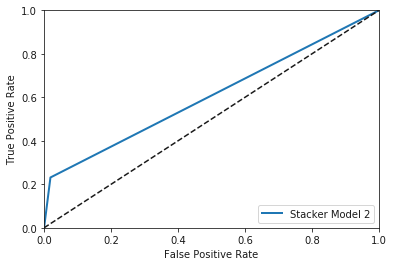

In [92]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_stacker2)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr,linewidth= 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr, label = "Stacker Model 2")
plt.legend(loc="lower right")
plt.show()

## References


   Breiman, L. Machine Learning (1996) 24: 123. https://doi.org/10.1023/A:1018054314350

   Fawcett, T. (2006). An introduction to ROC analysis. Pattern Recognition Letters, 27, 861-874. 
    
   Friedman, J. (2001). Greedy function approximation: A gradient boosting machine.
Annals of Statistics, 29(5), 1189–1232.

   Friedman, J. (2002). Stochastic gradient boosting. Computational Statistics & Data
Analysis, 38(4), 367–378.
Hastie, T., Tibshirani, R., & F

   Hastie, T., Tibshirani, R., & Friedman, J. (2001). The elements of statistical learning, data mining, inference, and prediction. New York: Springer. Henley, W. E., & Hand, D. J. (1997). Construction of a k-nearest nei

   Huang, Y.-M., Hunga, C.-M., & Jiau, H. C. (2006). Evaluation of neural networks and data mining methods on a credit assessment task for class imbalance problem. Nonlinear Analysis: Real World Applications, 7, 720-747.
    
   Lei, P. and Wu, Q. (2007), Introduction to Structural Equation Modeling: Issues and Practical Considerations. Educational Measurement: Issues and Practice, 26: 33-43. doi:10.1111/j.1745-3992.2007.00099.x
    
   Lessmann, Stefan & Baesens, Bart & Seow, Hsin-Vonn & Thomas, Lyn. (2015). Benchmarking state-of-the-art classification algorithms for credit scoring: An update of research. European Journal of Operational Research. (doi:10.1016/j.ejor.2015.05.030). 10.1016/j.ejor.2015.05.030.
       
   Mantas C.J., Abellán J. (2014) Credal Decision Trees to Classify Noisy Data Sets. In: Polycarpou M., de Carvalho A.C.P.L.F., Pan JS., Woźniak M., Quintian H., Corchado E. (eds) Hybrid Artificial Intelligence Systems. HAIS 2014. Lecture Notes in Computer Science, vol 8480. Springer, Cham
    
   Nanni, L., & Lumini, A. (2009). An experimental comparison of ensemble of classifiers for bankruptcy prediction and credit scoring. Expert Syst. Appl., 36, 3028-3033.
    
   Partalas, Ioannis & Tsoumakas, Grigorios & Vlahavas, I. (2010). An ensemble uncertainty aware measure for directed hill climbing ensemble pruning. Machine Learning. 81. 257-282. 10.1007/s10994-010-5172-0. 
    
  Skurichina, M. & Duin, R. Pattern Anal Appl (2002) 5: 121. https://doi.org/10.1007/s100440200011
    

